# Model Massive Star Formation Region

In [82]:
%pylab inline
from pywavan import fan_trans, powspec, gauss_beam, fbm2d, imsmooth

Populating the interactive namespace from numpy and matplotlib


Create an fBm with a power similar to the Gaussian part of NGC2264"

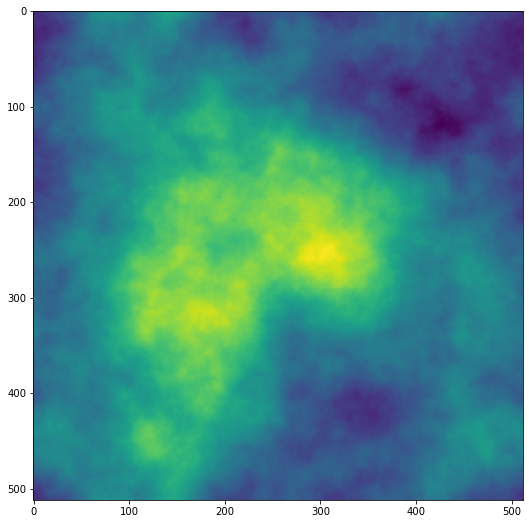

In [37]:
gamma = -3.8
#fbm = fbm2d(gamma,512,512)

#fbm2 = np.roll(fbm,350, axis=0)
#np.save('/Users/robitaij/postdoc/fil2star/massive_model/fbm.npy',fbm2)
fbm = np.load('/Users/robitaij/postdoc/fil2star/massive_model/fbm.npy')

figure(figsize(9,9))
imshow(fbm)

Create a directional multiplicative cascade image from the fBm.

In [61]:
#Wavelet transform with angle dependency
wt, S11a, wav_k, S1a, q = fan_trans(fbm, reso=1, q=0, qdyn=False, angular=True)

In [48]:
mfrac=np.zeros(fbm.shape)
xo = 1.0
Ndir = 11
coeff = 0.202     #Mach=1.5

for j in range(Ndir):
    casc=np.zeros(fbm.shape)   
    for i in range(np.size(wav_k)):
        aa=np.copy(wt[i,j,:,:].real)
        casc+=aa/np.std(aa)*coeff
    mfrac+=np.exp(casc)
    
mfrac = mfrac/(Ndir)

logvar = np.log(1+np.std(mfrac)**2./np.mean(mfrac)**2.)
Nmach2 =  np.sqrt(2*(np.exp(logvar)-1))
print('Mach=',Nmach2)

Mach= 1.620244938284213


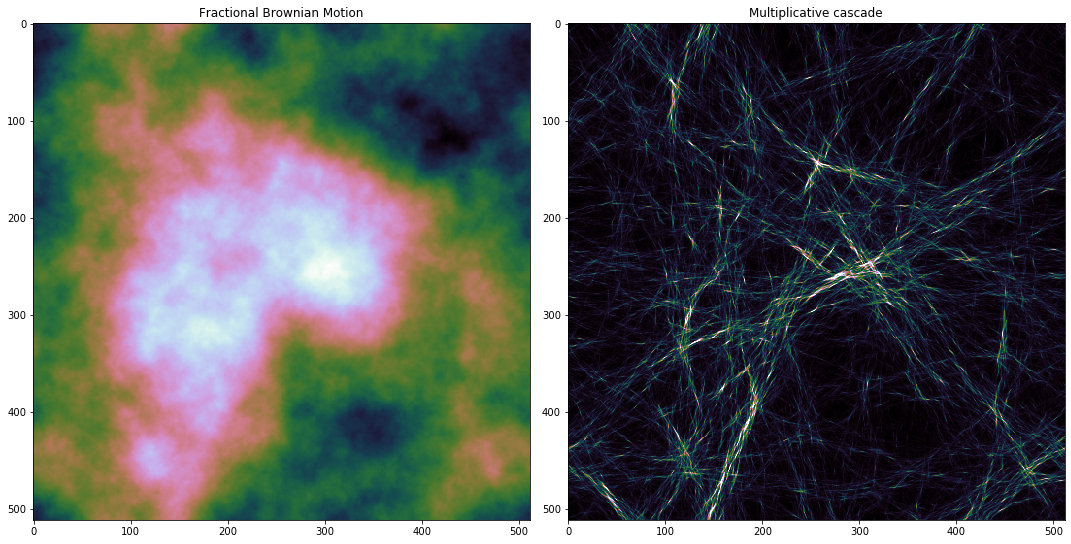

In [107]:
figure(figsize(15,9))
subplot(1,2,1)
imshow(fbm,cmap='cubehelix')
title('Fractional Brownian Motion')
subplot(1,2,2)
imshow(mfrac,cmap='cubehelix',vmax=35)
title('Multiplicative cascade')
tight_layout()

Addition of both model.

In [65]:
# Modify the power of the multiplicative cascade
coef,cov = np.polyfit(np.log(wav_k),np.log(S1aM),deg=1,cov=True)

newexp = -2.5
oldexp = coef[0]
print('oldexp =', coef[0])

wtM, S11aM, wav_k, S1aM, qM = fan_trans(mfrac, reso=1, q=0, qdyn=False, angular=True, zeromean=False)

for i in range(size(wav_k)):
    wtM[i,:,:,:] = wtM[i,:,:,:]*(wav_k[i])**((newexp-oldexp)/2.)

mfrac2 = np.sum(wtM ,axis=(0,1)).real

oldexp = -1.8043663190213686


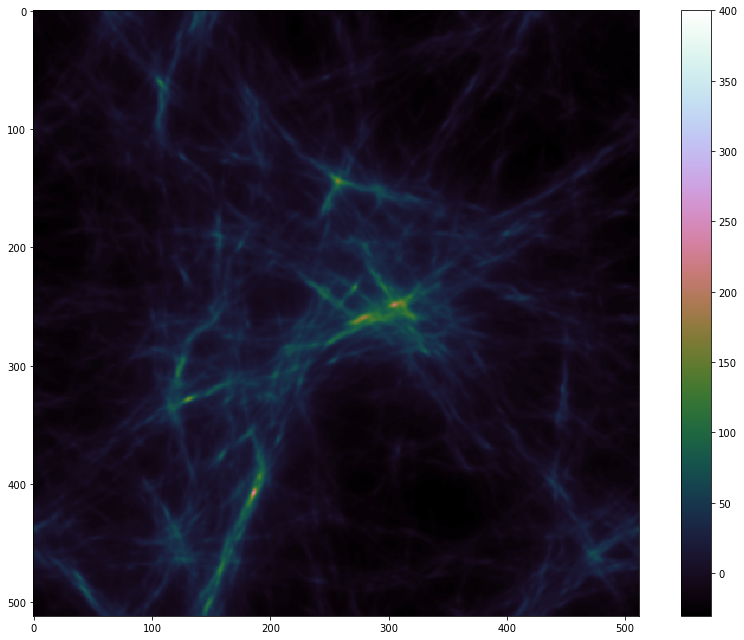

In [121]:
factor = 1.0
#model = mfrac2+factor*fbm

FWHM = 3.0
model = imsmooth(mfrac2,FWHM).real+factor*imsmooth(fbm,FWHM).real

figure(figsize(12,9))
imshow(model,vmax=400,cmap='cubehelix')
colorbar()
tight_layout()

## Power spectrum analysis

In [122]:
#Set a list of q
q=[]
q=[2.9]*26

#Wavelet power spectrum
wt2, S11a2, wav_k, S1a2, q2 = fan_trans(model, reso=1, q=q, qdyn=True, skewl=0.4)

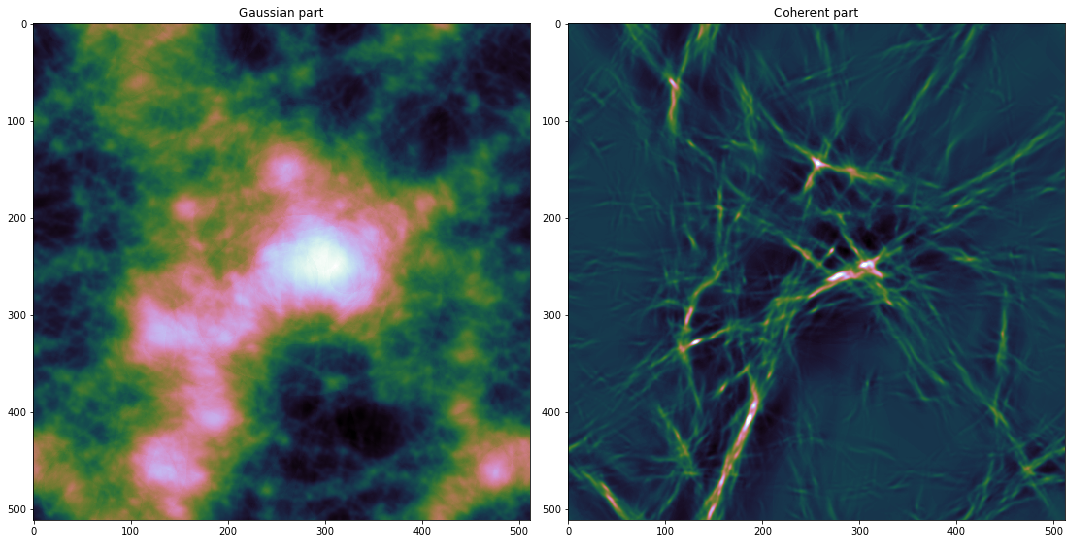

In [123]:
M = wav_k.shape[0]

coherent = np.sum(wt2[M:2*M,:,:],axis=0).real
Gaussian = np.sum(wt2[2*M:3*M,:,:],axis=0).real

figure(figsize(15,9))
subplot(1,2,1)
imshow(Gaussian,cmap='cubehelix')
title('Gaussian part')
subplot(1,2,2)
imshow(coherent,cmap='cubehelix',vmax=120)
title('Coherent part')
tight_layout()

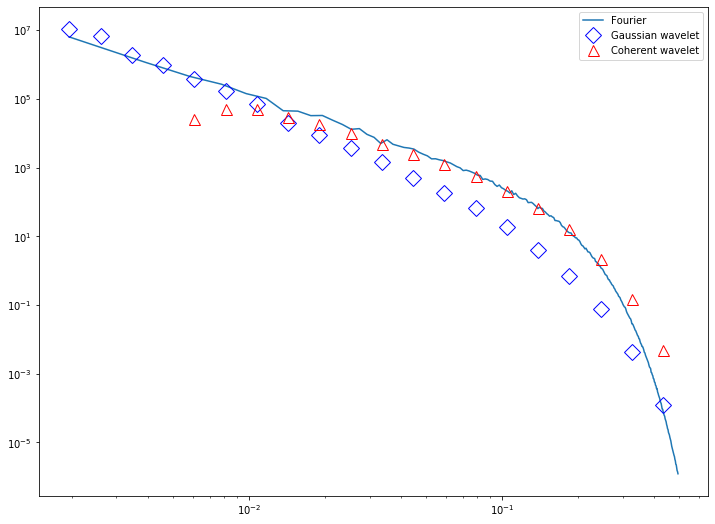

In [125]:
tab_k, spec_k = powspec(model,reso=1)

figure(figsize(12,9))
plot(tab_k, spec_k,label='Fourier')
plot(wav_k[:-1], S1a2[2,:-1],'D', markersize = 11, markerfacecolor='none', markeredgecolor='blue', label='Gaussian wavelet')
plot(wav_k[:-1], S1a2[1,:-1],'^', markersize = 11, markerfacecolor='none', markeredgecolor='red', label='Coherent wavelet')
xscale('log')
yscale('log')
legend()